##### Copyright 2019 The TensorFlow Authors.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-055.png', 'rock03-024.png', 'rock04-021.png', 'rock06ck02-013.png', 'rock05ck01-026.png', 'rock02-001.png', 'rock02-087.png', 'rock03-004.png', 'rock05ck01-002.png', 'rock01-039.png']
['paper06-074.png', 'paper06-011.png', 'paper03-077.png', 'paper05-092.png', 'paper06-053.png', 'paper07-033.png', 'paper06-071.png', 'paper07-075.png', 'paper06-033.png', 'paper02-041.png']
['testscissors01-017.png', 'testscissors01-026.png', 'scissors02-074.png', 'scissors01-013.png', 'scissors03-086.png', 'testscissors01-034.png', 'testscissors02-016.png', 'testscissors02-106.png', 'scissors01-037.png', 'scissors02-107.png']


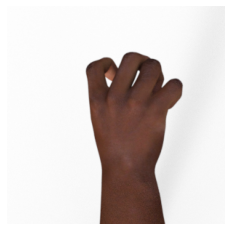

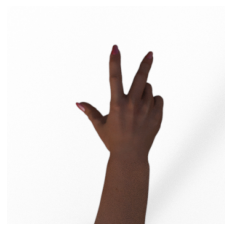

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


# model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [25]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 16s 778ms/step - loss: 0.1059 - accuracy: 0.9683 - val_loss: 0.0563 - val_accuracy: 0.9839
Epoch 2/25
20/20 [==============================] - 17s 834ms/step - loss: 0.1123 - accuracy: 0.9591 - val_loss: 0.0322 - val_accuracy: 0.9919
Epoch 3/25
20/20 [==============================] - 17s 831ms/step - loss: 0.1065 - accuracy: 0.9619 - val_loss: 0.0374 - val_accuracy: 0.9758
Epoch 4/25
20/20 [==============================] - 17s 825ms/step - loss: 0.1194 - accuracy: 0.9591 - val_loss: 0.3789 - val_accuracy: 0.7581
Epoch 5/25
20/20 [==============================] - 17s 827ms/step - loss: 0.0964 - accuracy: 0.9659 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 6/25
20/20 [==============================] - 16s 824ms/step - loss: 0.0681 - accuracy: 0.9762 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 7/25
20/20 [==============================] - 17s 833ms/step - loss: 0.1300 - accuracy: 0.9516 - val_loss: 0.0219 - val_accuracy: 1.0000

In [19]:
# import io
# import numpy as np
# from PIL import Image
# import ipywidgets as widgets
# from tensorflow.keras.preprocessing import image

In [20]:
# uploader = widgets.FileUpload(
#     accept='image/*',
#     multiple=True
# )

# uploader

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

In [22]:
# img = Image.open(io.BytesIO(uploader.value[next(iter(uploader.value))]['content']))

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images, batch_size=10)

# print(classes)

ValueError: in user code:

    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:717 call
        return self._run_internal_graph(
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/modanez/anaconda3/envs/tf_02/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 6272 but received input with shape [None, 1163008]


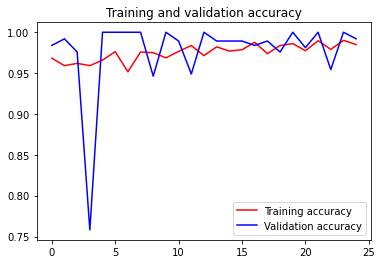

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)